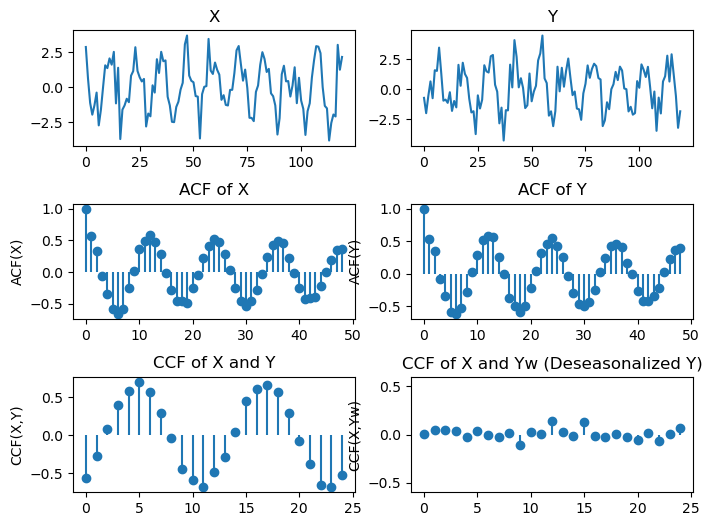

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, ccf
from scipy import signal
from statsmodels.api import OLS, add_constant

# Set the random seed for reproducibility
np.random.seed(1492)

# Number of points
num = 120
t = np.arange(1, num + 1)

# Generate the time series X and Y
X = 2 * np.cos(2 * np.pi * t / 12) + np.random.normal(size=num)
Y = 2 * np.cos(2 * np.pi * (t + 5) / 12) + np.random.normal(size=num)

# Remove the seasonal component from Y by regressing on cos and sin
cos_term = np.cos(2 * np.pi * t / 12)
sin_term = np.sin(2 * np.pi * t / 12)
exog = add_constant(np.column_stack((cos_term, sin_term)))
model = OLS(Y, exog).fit()
Yw = model.resid  # residuals from the regression (deseasonalized Y)

# Set up the plot layout (3x2 grid)
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

# Plot X
axs[0, 0].plot(X)
axs[0, 0].set_title("X")

# Plot Y
axs[0, 1].plot(Y)
axs[0, 1].set_title("Y")

# Plot ACF of X
acf_X = acf(X, nlags=48)
axs[1, 0].stem(acf_X, basefmt=" ", use_line_collection=True)
axs[1, 0].set_ylabel("ACF(X)")
axs[1, 0].set_title("ACF of X")

# Plot ACF of Y
acf_Y = acf(Y, nlags=48)
axs[1, 1].stem(acf_Y, basefmt=" ", use_line_collection=True)
axs[1, 1].set_ylabel("ACF(Y)")
axs[1, 1].set_title("ACF of Y")

# Plot CCF of X and Y
ccf_XY = ccf(X, Y)[:25]  # limiting to first 24 lags like R
axs[2, 0].stem(ccf_XY, basefmt=" ", use_line_collection=True)
axs[2, 0].set_ylabel("CCF(X,Y)")
axs[2, 0].set_title("CCF of X and Y")

# Plot CCF of X and deseasonalized Y (Yw)
ccf_XYw = ccf(X, Yw)[:25]
axs[2, 1].stem(ccf_XYw, basefmt=" ", use_line_collection=True)
axs[2, 1].set_ylabel("CCF(X,Yw)")
axs[2, 1].set_ylim([-0.6, 0.6])
axs[2, 1].set_title("CCF of X and Yw (Deseasonalized Y)")

plt.show()


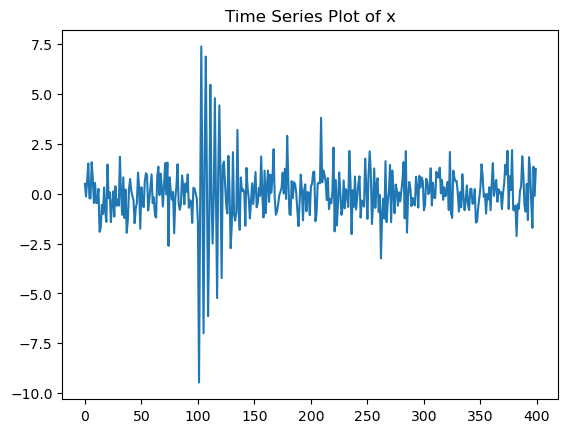

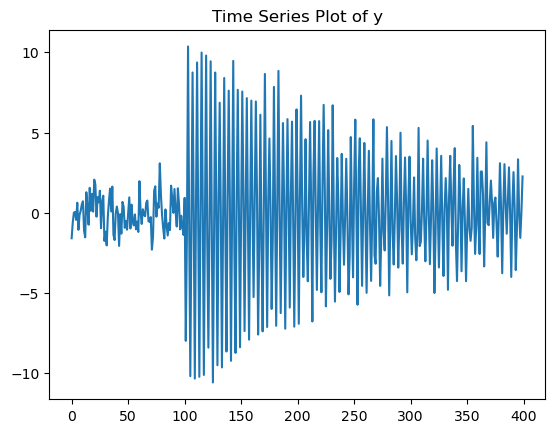

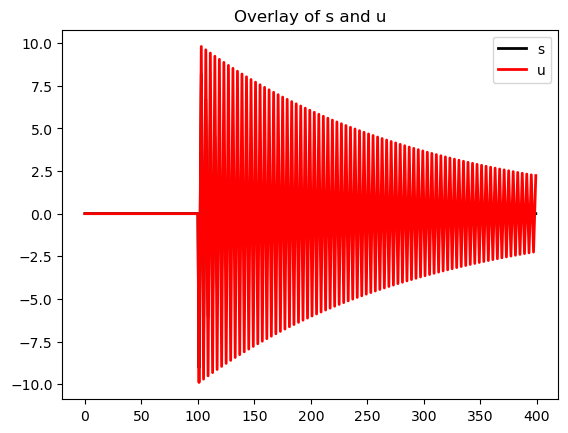

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Part 1: Generate signal `s` and noisy signal `x`
s = np.concatenate([np.zeros(100), 10 * np.exp(-(np.arange(1, 301) / 20)) * 
                    np.cos(2 * np.pi * np.arange(1, 301) / 4)])
x = s + np.random.normal(size=400)

# Plot the noisy signal `x`
plt.figure()
plt.plot(x)
plt.title('Time Series Plot of x')
plt.show()

# Part 1.2-b: Generate signal `u` and noisy signal `y`
u = np.concatenate([np.zeros(100), 10 * np.exp(-(np.arange(1, 301) / 200)) * 
                    np.cos(2 * np.pi * np.arange(1, 301) / 4)])
y = u + np.random.normal(size=400)

# Plot the noisy signal `y`
plt.figure()
plt.plot(y)
plt.title('Time Series Plot of y')
plt.show()

# Part 1.2-c: Plot both `s` and `u` on the same plot
plt.figure()
plt.plot(s, color='black', label='s', linewidth=2)  # col = 1 in R
plt.plot(u, color='red', label='u', linewidth=2)    # col = 2 in R
plt.title('Overlay of s and u')
plt.legend()
plt.show()

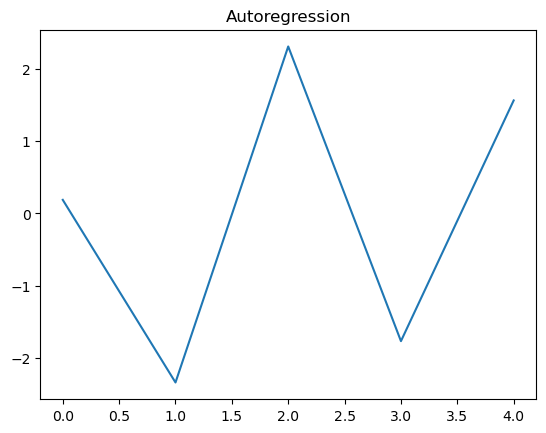

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate random numbers from a normal distribution
w = np.random.normal(size=5)

# Apply recursive filtering (autoregression)
# The equivalent of filter in R with method="recursive"
x = lfilter([1], [1, 1], -1*w)

# Plot the result
plt.plot(x)
plt.title("Autoregression")
plt.show()

In [7]:
help(lfilter)

Help on function lfilter in module scipy.signal._signaltools:

lfilter(b, a, x, axis=-1, zi=None)
    Filter data along one-dimension with an IIR or FIR filter.
    
    Filter a data sequence, `x`, using a digital filter.  This works for many
    fundamental data types (including Object type).  The filter is a direct
    form II transposed implementation of the standard difference equation
    (see Notes).
    
    The function `sosfilt` (and filter design using ``output='sos'``) should be
    preferred over `lfilter` for most filtering tasks, as second-order sections
    have fewer numerical problems.
    
    Parameters
    ----------
    b : array_like
        The numerator coefficient vector in a 1-D sequence.
    a : array_like
        The denominator coefficient vector in a 1-D sequence.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        An N-dimensional input array.
    axis : int, optional
        The axis of the input d

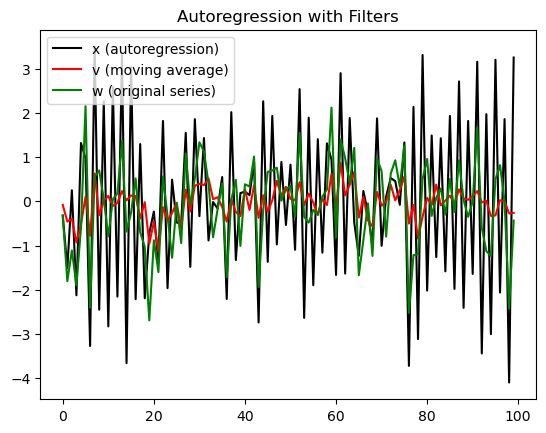

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate 100 random numbers from a normal distribution (equivalent to rnorm(100) in R)
w = np.random.normal(size=100)

# Apply a recursive filter (autoregression) equivalent to filter with method="recursive"
x = lfilter([1], [1, 0.9], w)

# Apply a simple moving average filter (equivalent to rep(1/4, 4) in R)
v = lfilter([1/4] * 4, [1], x)

# Plot the autoregression (x)
plt.plot(x, label="x (autoregression)", color="black")
plt.title("Autoregression with Filters")

# Add the moving average (v) as a red line
plt.plot(v, label="v (moving average)", color="red")

# Add the original series (w) as a green line
plt.plot(w, label="w (original series)", color="green")

# Add a legend in the top-left corner
plt.legend(loc='upper left')

# Display the plot
plt.show()

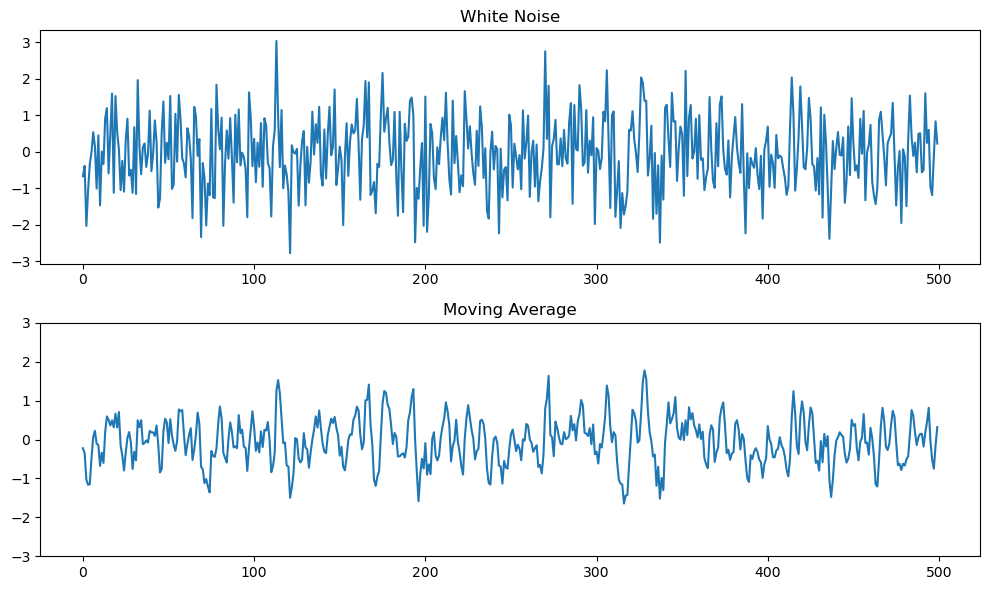

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate 500 random numbers from a normal distribution (equivalent to rnorm(500, 0, 1) in R)
w = np.random.normal(0, 1, 500)

# Apply a symmetric moving average filter with a window size of 3 (sides=2 equivalent in R)
v = lfilter([1/3]*3, 1, w)

# Plot the white noise (w) and moving average (v)
plt.figure(figsize=(10, 6))

# Plot 1: White noise
plt.subplot(2, 1, 1)
plt.plot(w)
plt.title("White Noise")

# Plot 2: Moving average, with y-limits set to (-3, 3)
plt.subplot(2, 1, 2)
plt.plot(v)
plt.ylim([-3, 3])
plt.title("Moving Average")

# Display the plots
plt.tight_layout()
plt.show()

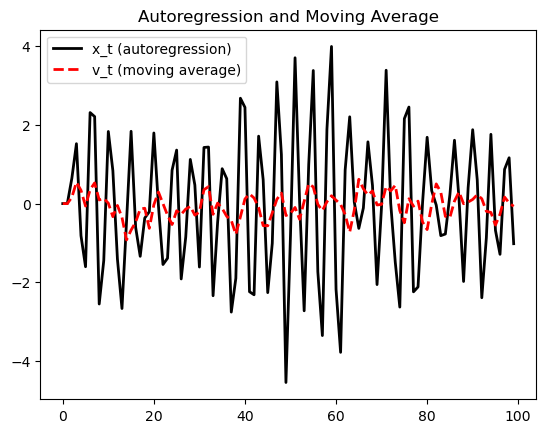

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Part (a)
np.random.seed(42)

# Number of observations
n = 100

# Generate white noise
w = np.random.normal(0, 1, n)

# Initialize x with zeros, we will fill the values
x = np.zeros(n)

# Generate the autoregressive series x_t = -0.9 * x_{t-2} + w_t
for t in range(2, n):
    x[t] = -0.9 * x[t-2] + w[t]

# Apply moving average filter: v_t = (x_t + x_{t-1} + x_{t-2} + x_{t-3}) / 4
v = lfilter([1/4]*4, 1, x)

# Plot x and v
plt.plot(x, label="x_t (autoregression)", color="black", linewidth=2)
plt.plot(v, label="v_t (moving average)", color="red", linestyle="--", linewidth=2)
plt.title("Autoregression and Moving Average")
plt.legend()
plt.show()

# Comment: The autoregressive series (x_t) shows more volatility and sharp changes, 
# whereas the moving average series (v_t) smoothens the fluctuations, reducing the noise.

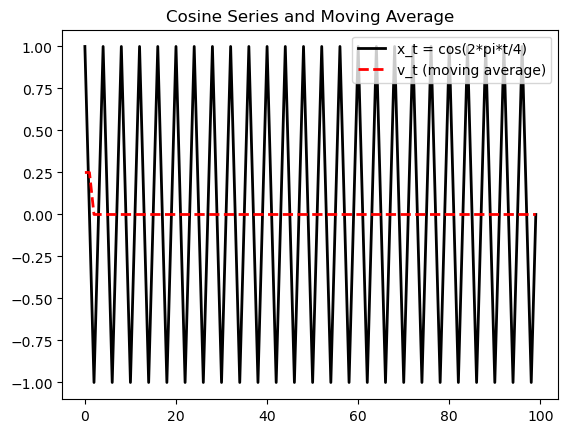

In [38]:
# Part (b)
t = np.arange(n)

# Generate x_t = cos(2 * pi * t / 4)
x_b = np.cos(2 * np.pi * t / 4)

# Apply moving average filter: v_t = (x_t + x_{t-1} + x_{t-2} + x_{t-3}) / 4
v_b = lfilter([1/4]*4, 1, x_b)

# Plot x and v
plt.plot(x_b, label="x_t = cos(2*pi*t/4)", color="black", linewidth=2)
plt.plot(v_b, label="v_t (moving average)", color="red", linestyle="--", linewidth=2)
plt.title("Cosine Series and Moving Average")
plt.legend()
plt.show()

# Comment: The cosine function (x_t) is periodic and smooth by nature. The moving average 
# further smooths out the curve, but the effect is less significant compared to part (a).

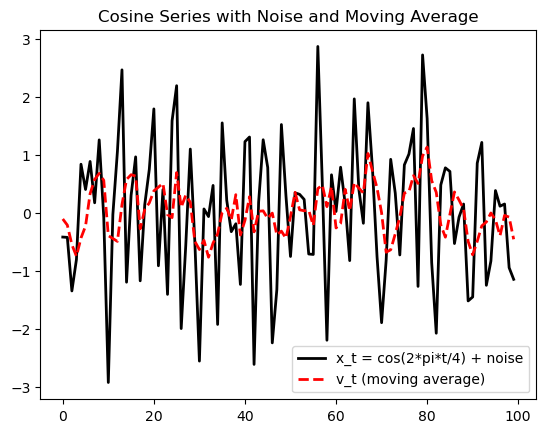

In [39]:
# Part (c)
# Generate white noise
w_c = np.random.normal(0, 1, n)

# Generate x_t = cos(2 * pi * t / 4) + w_t
x_c = np.cos(2 * np.pi * t / 4) + w_c

# Apply moving average filter: v_t = (x_t + x_{t-1} + x_{t-2} + x_{t-3}) / 4
v_c = lfilter([1/4]*4, 1, x_c)

# Plot x and v
plt.plot(x_c, label="x_t = cos(2*pi*t/4) + noise", color="black", linewidth=2)
plt.plot(v_c, label="v_t (moving average)", color="red", linestyle="--", linewidth=2)
plt.title("Cosine Series with Noise and Moving Average")
plt.legend()
plt.show()

# Comment: When noise is added to the cosine series, the moving average helps to smooth 
# the noisy signal, reducing the randomness while maintaining the overall periodic pattern.